In [ ]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video
type(data)

In [ ]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])#create df(data frame),then add timestamp and create new column
df['timestamp'] = pd.to_datetime('now')#
df

In [8]:
#call api,use key,tested,loaded and formatted,then append dataframe(df2)
def api_runner():#run api
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)


    # Use this if you want to create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\Admin\Desktop\Data Analyst  Project\Python\DocumentsAPITestNoteBook\API.csv'):
        df.to_csv(r'C:\Users\Admin\Desktop\Data Analyst  Project\Python\DocumentsAPITestNoteBook\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\Admin\Desktop\Data Analyst  Project\Python\DocumentsAPITestNoteBook\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')

# If that didn't work try using the local host URL as shown in the video


In [9]:
#automate python script
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()#call api
    print('API Runner completed')#tell us run succesfully
    sleep(60) #sleep for 1 minute,run every min
exit()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5932\1874285358.py:31: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\Admin\AppData\Local\Temp\ipykernel_5932\1874285358.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
C:\Users\Admin\AppData\Local\Temp\ipykernel_5932\1874285358.py:37: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


C:\Users\Admin\AppData\Local\Temp\ipykernel_5932\1874285358.py:31: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\Admin\AppData\Local\Temp\ipykernel_5932\1874285358.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
C:\Users\Admin\AppData\Local\Temp\ipykernel_5932\1874285358.py:37: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


KeyboardInterrupt: 

In [37]:
df72 = pd.read_csv(r'C:\Users\Admin\Desktop\Data Analyst  Project\Python\DocumentsAPITestNoteBook\API.csv')
df72


,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10469,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.948684e+07,1.948684e+07,False,NaN,1,NaN,NaN,NaN,2023-09-16T02:02:00.000Z,26659.171641,1.144184e+10,-10.0080,0.046367,0.455686,3.025133,-6.753514,-11.788338,0.632305,5.195031e+11,48.9180,5.598426e+11,NaN,2023-09-16T02:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-16 02:04:28.134413
1,1,1027,Ethereum,ETH,ethereum,7391,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202228e+08,1.202228e+08,True,NaN,2,NaN,NaN,NaN,2023-09-16T02:02:00.000Z,1644.210316,4.343848e+09,-9.9307,0.080437,0.866731,0.493921,-8.469873,-14.178667,-4.841396,1.976716e+11,18.6193,1.976716e+11,NaN,2023-09-16T02:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-16 02:04:28.134413
2,2,825,Tether USDt,USDT,tether,62337,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.304192e+10,8.543720e+10,True,NaN,3,NaN,NaN,NaN,2023-09-16T02:02:00.000Z,1.000089,1.933961e+10,-1.9083,-0.027698,-0.013812,0.019971,0.098172,-0.002835,0.041512,8.304931e+10,7.8229,8.544480e+10,NaN,2023-09-16T02:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-16 02:04:28.134413
3,3,1839,BNB,BNB,bnb,1624,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.538485e+08,1.538485e+08,False,NaN,4,NaN,NaN,NaN,2023-09-16T02:02:00.000Z,214.890541,4.861268e+08,46.3696,0.063874,1.238283,0.022837,-6.743705,-12.782505,-12.213290,3.306058e+10,3.1134,3.306058e+10,NaN,2023-09-16T02:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-16 02:04:28.134413
4,4,52,XRP,XRP,xrp,1086,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.317540e+10,9.998843e+10,False,NaN,5,NaN,NaN,NaN,2023-09-16T02:02:00.000Z,0.500836,9.459439e+08,24.4073,0.233649,1.641177,-0.611957,-15.352955,-32.258503,4.212318,2.663217e+10,2.5086,5.008362e+10,NaN,2023-09-16T02:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-16 02:04:28.134413
5,5,3408,USD Coin,USDC,usd-coin,14097,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.611028e+10,2.611028e+10,False,NaN,6,NaN,NaN,NaN,2023-09-16T02:02:00.000Z,1.000063,2.589131e+09,-12.6759,-0.016500,-0.011285,-0.015471,-0.007331,0.011832,-0.002465,2.611192e+10,2.4586,2.611192e+10,NaN,2023-09-16T02:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-16 02:04:28.134413
6,6,2010,Cardano,ADA,cardano,934,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.510223e+10,3.616798e+10,False,NaN,7,NaN,NaN,NaN,2023-09-16T02:02:00.000Z,0.251397,1.289893e+08,26.9852,0.309468,-0.427771,-1.321924,-8.825298,-19.751843,-6.110754,8.824578e+09,0.8312,1.131284e+10,NaN,2023-09-16T02:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-16 02:04:28.134413
7,7,74,Dogecoin,DOGE,dogecoin,799,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.410239e+11,1.410239e+11,True,NaN,8,NaN,NaN,NaN,2023-09-16T02:02:00.000Z,0.062546,1.559710e+08,-12.3752,0.096104,0.676674,-1.765293,-7.680470,-10.930524,0.952989,8.820514e+09,0.8307,8.820514e+09,NaN,2023-09-16T02:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-16 02:04:28.134413
8,8,5426,Solana,SOL,solana,525,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 

In [38]:
df

In [ ]:
#
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [39]:
df

,level_0,index,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,0,1,Bitcoin,BTC,bitcoin,10469,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.948684e+07,1.948684e+07,False,NaN,1,NaN,NaN,None,2023-09-16T02:04:00.000Z,26671.792328,1.142058e+10,-10.1595,0.085105,0.380007,3.091439,-6.713758,-11.739259,0.660077,5.197490e+11,48.9411,5.601076e+11,None,2023-09-16T02:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-16 02:05:28.421058
1,1,1,1027,Ethereum,ETH,ethereum,7391,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202228e+08,1.202228e+08,True,NaN,2,NaN,NaN,None,2023-09-16T02:04:00.000Z,1644.716380,4.333468e+09,-10.0779,0.099692,0.686337,0.539364,-8.450045,-14.143667,-4.813291,1.977325e+11,18.6166,1.977325e+11,None,2023-09-16T02:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-16 02:05:28.421058
2,2,2,825,Tether USDt,USDT,tether,62337,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.304192e+10,8.543720e+10,True,NaN,3,NaN,NaN,None,2023-09-16T02:04:00.000Z,1.000181,1.930794e+10,-2.0749,-0.019906,0.013855,0.036137,0.104954,0.011442,0.061319,8.305692e+10,7.8203,8.545263e+10,None,2023-09-16T02:04:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-16 02:05:28.421058
3,3,3,1839,BNB,BNB,bnb,1624,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538485e+08,1.538485e+08,False,NaN,4,NaN,NaN,None,2023-09-16T02:04:00.000Z,214.949326,4.865143e+08,46.3436,0.119996,1.162213,0.043943,-6.720412,-12.749103,-12.249969,3.306963e+10,3.1143,3.306963e+10,None,2023-09-16T02:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-16 02:05:28.421058
4,4,4,52,XRP,XRP,xrp,1086,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.317540e+10,9.998843e+10,False,NaN,5,NaN,NaN,None,2023-09-16T02:04:00.000Z,0.501267,9.403988e+08,23.7226,0.336537,1.564740,-0.539030,-15.258214,-32.182970,4.260212,2.665510e+10,2.5098,5.012675e+10,None,2023-09-16T02:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-16 02:05:28.421058
5,5,5,3408,USD Coin,USDC,usd-coin,14097,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.611028e+10,2.611028e+10,False,NaN,6,NaN,NaN,None,2023-09-16T02:04:00.000Z,1.000116,2.586417e+09,-12.8164,-0.026232,0.005470,-0.008276,-0.000351,0.024055,0.010378,2.611332e+10,2.4587,2.611332e+10,None,2023-09-16T02:04:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-16 02:05:28.421058
6,6,6,2010,Cardano,ADA,cardano,934,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.510223e+10,3.616798e+10,False,NaN,7,NaN,NaN,None,2023-09-16T02:04:00.000Z,0.251653,1.281596e+08,25.4365,0.348706,-0.653341,-1.233564,-8.743301,-19.642309,-6.038727,8.833576e+09,0.8317,1.132438e+10,None,2023-09-16T02:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-16 02:05:28.421058
7,7,7,74,Dogecoin,DOGE,dogecoin,799,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.410239e+11,1.410239e+11,True,NaN,8,NaN,NaN,None,2023-09-16T02:04:00.000Z,0.062564,1.551597e+08,-12.6856,0.136011,0.601390,-1.762244,-7.664434,-10.926369,0.982915,8.822990e+09,0.8309,8.822990e+09,None,2023-09-16T02:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-16 02:05:28.421058
8,8,8,5426,Solana,SOL,solana,525,2020-04-10T00:00:00.000Z,"[pos, 

In [40]:
# Now let's look at the coin trends over time


df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.085105,0.380007,3.091439,-6.713758,-11.739259,0.660077
Ethereum,0.099692,0.686337,0.539364,-8.450045,-14.143667,-4.813291
Tether USDt,-0.019906,0.013855,0.036137,0.104954,0.011442,0.061319
BNB,0.119996,1.162213,0.043943,-6.720412,-12.749103,-12.249969
XRP,0.336537,1.564740,-0.539030,-15.258214,-32.182970,4.260212
USD Coin,-0.026232,0.005470,-0.008276,-0.000351,0.024055,0.010378
Cardano,0.348706,-0.653341,-1.233564,-8.743301,-19.642309,-6.038727
Dogecoin,0.136011,0.601390,-1.762244,-7.664434,-10.926369,0.982915
Solana,0.085386,0.652453,-2.018643,-17.425804,-28.612023,23.037338


In [41]:
#this is series not data frame
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.085105
             quote.USD.percent_change_24h     0.380007
             quote.USD.percent_change_7d      3.091439
             quote.USD.percent_change_30d    -6.713758
             quote.USD.percent_change_60d   -11.739259
             quote.USD.percent_change_90d     0.660077
Ethereum     quote.USD.percent_change_1h      0.099692
             quote.USD.percent_change_24h     0.686337
             quote.USD.percent_change_7d      0.539364
             quote.USD.percent_change_30d    -8.450045
             quote.USD.percent_change_60d   -14.143667
             quote.USD.percent_change_90d    -4.813291
Tether USDt  quote.USD.percent_change_1h     -0.019906
             quote.USD.percent_change_24h     0.013855
             quote.USD.percent_change_7d      0.036137
             quote.USD.percent_change_30d     0.104954
             quote.USD.percent_change_60d     0.011442
             quote.USD.

In [13]:
type(df4)

pandas.core.series.Series

In [42]:
#it's in dataframe(df) but name is acted like index
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin     quote.USD.percent_change_1h    0.085105
            quote.USD.percent_change_24h   0.380007
            quote.USD.percent_change_7d    3.091439
            quote.USD.percent_change_30d  -6.713758
            quote.USD.percent_change_60d -11.739259
            quote.USD.percent_change_90d   0.660077
Ethereum    quote.USD.percent_change_1h    0.099692
            quote.USD.percent_change_24h   0.686337
            quote.USD.percent_change_7d    0.539364
            quote.USD.percent_change_30d  -8.450045
            quote.USD.percent_change_60d -14.143667
            quote.USD.percent_change_90d  -4.813291
Tether USDt quote.USD.percent_change_1h   -0.019906
            quote.USD.percent_change_24h   0.013855
            quote.USD.percent_change_7d    0.036137
            quote.USD.percent_change_30d   0.104954
            quote.USD.percent_change_60d   0.011442
            quote.USD.percent_change_90d   0.061319
BNB         quote.USD.percent_change_1h    0.119996
            quote.USD.percent_change_24h   1.162213
            quote.USD.percent_change_7d    0.043943
            quote.USD.percent_change_30d  -6.720412
            quote.USD.percent_change_60d -12.749103
            quote.USD.percent_change_90d -12.249969
XRP         quote.USD.percent_change_1h    0.336537
            quote.USD.percent_change_24h   1.564740
            quote.USD.percent_change_7d   -0.539030
            quote.USD.percent_change_30d -15.258214
            quote.USD.percent_change_60d -32.182970
            quote.USD.percent_change_90d   4.260212
USD Coin    quote.USD.percent_change_1h   -0.026232
            quote.USD.percent_change_24h   0.005470
            quote.USD.percent_change_7d   -0.008276
            quote.USD.percent_change_30d  -0.000351
            quote.USD.percent_change_60d   0.024055
            quote.USD.percent_change_90d   0.010378
Cardano     quote.USD.percent_change_1h    0.348706
            quote.USD.percent_change_24h  -0.653341
            quote.USD.percent_change_7d   -1.233564
            quote.USD.percent_change_30d  -8.743301
            quote.USD.percent_change_60d -19.642309
            quote.USD.percent_change_90d  -6.038727
Dogecoin    quote.USD.percent_change_1h    0.136011
            quote.USD.percent_change_24h   0.601390
            quote.USD.percent_change_7d   -1.762244
            quote.USD.percent_change_30d  -7.664434
            quote.USD.percent_change_60d -10.926369
            quote.USD.percent_change_90d   0.982915
Solana      quote.USD.percent_change_1h    0.085386
            quote.USD.percent_change_24h   0.652453
            quote.USD.percent_change_7d   -2.018643
            quote.USD.percent_change_30d -17.425804
            quote.USD.percent_change_60d -28.612023
            quote.USD.percent_change_90d  23.037338
TRON        quote.USD.percent_change_1h    0.286875
            quote.USD.percent_change_24h   0.948796
            quote.USD.percent_change_7d    6.785553
            quote.USD.percent_change_30d  12.677840
            quote.USD.percent_change_60d   4.840014
            quote.USD.percent_change_90d  17.690366
Toncoin     quote.USD.percent_change_1h    0.922265
            quote.USD.percent_change_24h  10.815743
            quote.USD.percent_change_7d   19.204290
            quote.USD.percent_change_30d  46.580328
            quote.USD.percent_change_60d  56.198773
            quote.USD.percent_change_90d  51.353724
Dai         quote.USD.percent_change_1h   -0.009163
            quote.USD.percent_change_24h  -0.027179
            quote.USD.percent_change_7d   -0.010330
            quote.USD.percent_change_30d   0.004513
            quote.USD.percent_change_60d  -0.004269
            quote.USD.percent_change_90d  -0.007072
Polkadot    quote.USD.percent_change_1h    0.440973
            quote.USD.percent_change_24h   2.475441
            quote.USD.percent_change_7d   -1.512973
            quote.USD.percent_change_30d 

In [15]:
df5.count()

values    90
dtype: int64

In [43]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.set_index(index)
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,values
0,0.085105
1,0.380007
2,3.091439
3,-6.713758
4,-11.739259
5,0.660077
6,0.099692
7,0.686337
8,0.539364
9,-8.450045


In [52]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7
df7.columns



Index(['values'], dtype='object')

In [53]:
df7['values'] = df7['values'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7



,values
0,0.085105
1,0.380007
2,3.091439
3,-6.713758
4,-11.739259
5,0.660077
6,0.099692
7,0.686337
8,0.539364
9,-8.450045


In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

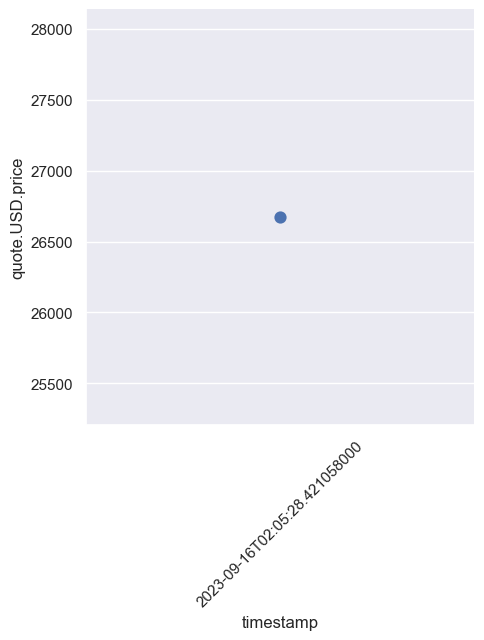

In [61]:
sns.catplot(x='timestamp', y='quote.USD.price', data=df10, kind='point')
plt.xticks(rotation=45)
plt.show()

In [49]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,26671.792328,2023-09-16 02:05:28.421058


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

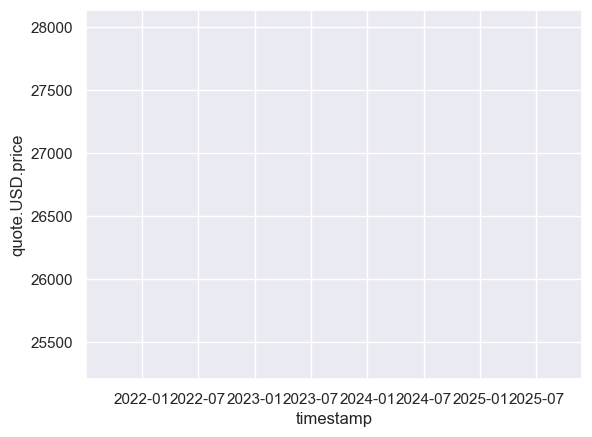

In [50]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)